In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('C:\\Users\\Chandan Gupta\\Documents\\Antrix_Academy_Python\\Call_Centre_Data.xlsx')

In [3]:
df.head()

,Call Id,Date,Agent,Department,Answered (Y/N),Resolved,Speed of Answer,AvgTalkDuration,Satisfaction rating,Column2
0,ID0001,2016-01-01 09:12:58.000,Diane,Washing Machine,Y,Y,109.0,00:02:23.210000,3.0,False
1,ID0002,2016-01-01 09:12:57.600,Becky,Air Conditioner,Y,N,70.0,00:04:02.323000,3.0,False
2,ID0003,2016-01-01 09:47:31.200,Stewart,Washing Machine,Y,Y,10.0,00:02:11.202000,3.0,False
3,ID0004,2016-01-01 09:47:31.200,Greg,Washing Machine,Y,Y,53.0,00:00:37.481000,2.0,False
4,ID0005,2016-01-01 10:00:28.800,Becky,Toaster,Y,Y,95.0,00:01:00.083000,3.0,False


In [4]:
df.tail()

,Call Id,Date,Agent,Department,Answered (Y/N),Resolved,Speed of Answer,AvgTalkDuration,Satisfaction rating,Column2
1767,ID1768,2016-01-31 16:56:38.400,Dan,Television,N,N,NaN,NaN,NaN,False
1768,ID1769,2016-01-31 17:08:09.600,Dan,Fridge,N,N,NaN,NaN,NaN,False
1769,ID1770,2016-01-31 17:08:09.600,Diane,Toaster,Y,Y,78.0,00:01:02.568000,4.0,False
1770,ID1771,2016-01-31 17:34:04.800,Jim,Fridge,Y,Y,91.0,00:02:58.667000,3.0,False
1771,ID1772,2016-01-31 17:34:04.800,Greg,Air Conditioner,Y,Y,121.0,00:06:01.008000,2.0,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1772 entries, 0 to 1771
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Call Id              1772 non-null   object        
 1   Date                 1772 non-null   datetime64[ns]
 2   Agent                1772 non-null   object        
 3   Department           1772 non-null   object        
 4   Answered (Y/N)       1772 non-null   object        
 5   Resolved             1772 non-null   object        
 6   Speed of Answer      1455 non-null   float64       
 7   AvgTalkDuration      1455 non-null   object        
 8   Satisfaction rating  1455 non-null   float64       
 9   Column2              1772 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(2), object(6)
memory usage: 126.4+ KB


In [6]:
df.describe()

,Speed of Answer,Satisfaction rating
count,1455.000000,1455.000000
mean,67.219931,3.454296
std,33.520874,1.177129
min,10.000000,1.000000
25%,39.000000,3.000000
50%,68.000000,4.000000
75%,96.000000,4.000000
max,125.000000,5.000000


###    ETL Process Starts Here................

In [7]:
df.rename(columns={"Answered (Y/N)":"Answered_Y_/_N","Call Id":"Call_Id","Speed of Answer":"Speed_of_Answer","AvgTalkDuration":"Avg_Talk_Duration","Satisfaction rating":"Satisfaction_Rating"},inplace = True)

In [8]:
df.drop("Column2",axis = 1,inplace = True)

In [9]:
df.head()

,Call_Id,Date,Agent,Department,Answered_Y_/_N,Resolved,Speed_of_Answer,Avg_Talk_Duration,Satisfaction_Rating
0,ID0001,2016-01-01 09:12:58.000,Diane,Washing Machine,Y,Y,109.0,00:02:23.210000,3.0
1,ID0002,2016-01-01 09:12:57.600,Becky,Air Conditioner,Y,N,70.0,00:04:02.323000,3.0
2,ID0003,2016-01-01 09:47:31.200,Stewart,Washing Machine,Y,Y,10.0,00:02:11.202000,3.0
3,ID0004,2016-01-01 09:47:31.200,Greg,Washing Machine,Y,Y,53.0,00:00:37.481000,2.0
4,ID0005,2016-01-01 10:00:28.800,Becky,Toaster,Y,Y,95.0,00:01:00.083000,3.0


In [10]:
df['Abandoned_Calls'] = np.where(df['Answered_Y_/_N'] == 'N',1,0)

In [11]:
df["Answered_Y_/_N"] = np.where(df["Answered_Y_/_N"] == 'Y',1,0)

In [12]:
df["Resolved"] = np.where(df["Resolved"] == 'Y',1,0)

In [13]:
df.head()

,Call_Id,Date,Agent,Department,Answered_Y_/_N,Resolved,Speed_of_Answer,Avg_Talk_Duration,Satisfaction_Rating,Abandoned_Calls
0,ID0001,2016-01-01 09:12:58.000,Diane,Washing Machine,1,1,109.0,00:02:23.210000,3.0,0
1,ID0002,2016-01-01 09:12:57.600,Becky,Air Conditioner,1,0,70.0,00:04:02.323000,3.0,0
2,ID0003,2016-01-01 09:47:31.200,Stewart,Washing Machine,1,1,10.0,00:02:11.202000,3.0,0
3,ID0004,2016-01-01 09:47:31.200,Greg,Washing Machine,1,1,53.0,00:00:37.481000,2.0,0
4,ID0005,2016-01-01 10:00:28.800,Becky,Toaster,1,1,95.0,00:01:00.083000,3.0,0


In [14]:
def getSeconds(val):
    sec = 0
    try:
        ls = str(val).split(':')
        sec = float(ls[0])*360 + float(ls[1])*60 + float(ls[2])
    except:
        sce = 0
    return sec

In [15]:
df['Avg._Time_Seconds'] = df['Avg_Talk_Duration'].map(getSeconds)

In [16]:
df.head()

,Call_Id,Date,Agent,Department,Answered_Y_/_N,Resolved,Speed_of_Answer,Avg_Talk_Duration,Satisfaction_Rating,Abandoned_Calls,Avg._Time_Seconds
0,ID0001,2016-01-01 09:12:58.000,Diane,Washing Machine,1,1,109.0,00:02:23.210000,3.0,0,143.210
1,ID0002,2016-01-01 09:12:57.600,Becky,Air Conditioner,1,0,70.0,00:04:02.323000,3.0,0,242.323
2,ID0003,2016-01-01 09:47:31.200,Stewart,Washing Machine,1,1,10.0,00:02:11.202000,3.0,0,131.202
3,ID0004,2016-01-01 09:47:31.200,Greg,Washing Machine,1,1,53.0,00:00:37.481000,2.0,0,37.481
4,ID0005,2016-01-01 10:00:28.800,Becky,Toaster,1,1,95.0,00:01:00.083000,3.0,0,60.083


In [17]:
df['Call_Flag'] = 1

In [18]:
df.head()

,Call_Id,Date,Agent,Department,Answered_Y_/_N,Resolved,Speed_of_Answer,Avg_Talk_Duration,Satisfaction_Rating,Abandoned_Calls,Avg._Time_Seconds,Call_Flag
0,ID0001,2016-01-01 09:12:58.000,Diane,Washing Machine,1,1,109.0,00:02:23.210000,3.0,0,143.210,1
1,ID0002,2016-01-01 09:12:57.600,Becky,Air Conditioner,1,0,70.0,00:04:02.323000,3.0,0,242.323,1
2,ID0003,2016-01-01 09:47:31.200,Stewart,Washing Machine,1,1,10.0,00:02:11.202000,3.0,0,131.202,1
3,ID0004,2016-01-01 09:47:31.200,Greg,Washing Machine,1,1,53.0,00:00:37.481000,2.0,0,37.481,1
4,ID0005,2016-01-01 10:00:28.800,Becky,Toaster,1,1,95.0,00:01:00.083000,3.0,0,60.083,1


In [19]:
df['Week_Number'] = df['Date'].dt.isocalendar().week

In [20]:
df['Weekday_Num'] = df['Date'].dt.dayofweek

In [21]:
df.head()

,Call_Id,Date,Agent,Department,Answered_Y_/_N,Resolved,Speed_of_Answer,Avg_Talk_Duration,Satisfaction_Rating,Abandoned_Calls,Avg._Time_Seconds,Call_Flag,Week_Number,Weekday_Num
0,ID0001,2016-01-01 09:12:58.000,Diane,Washing Machine,1,1,109.0,00:02:23.210000,3.0,0,143.210,1,53,4
1,ID0002,2016-01-01 09:12:57.600,Becky,Air Conditioner,1,0,70.0,00:04:02.323000,3.0,0,242.323,1,53,4
2,ID0003,2016-01-01 09:47:31.200,Stewart,Washing Machine,1,1,10.0,00:02:11.202000,3.0,0,131.202,1,53,4
3,ID0004,2016-01-01 09:47:31.200,Greg,Washing Machine,1,1,53.0,00:00:37.481000,2.0,0,37.481,1,53,4
4,ID0005,2016-01-01 10:00:28.800,Becky,Toaster,1,1,95.0,00:01:00.083000,3.0,0,60.083,1,53,4


### Application Part Starts here..............

In [22]:
# Problem : 2 Make a function to accept the week number and share the below mentioned values of respective week number.

def getWeeklyPerformance(week):
    print('Week Performance report for week : ',week)
    dfa = df[df['Week_Number'] == week]
    print("Total Calls :",dfa['Call_Flag'].sum())
    print("Calls Answered :",dfa['Answered_Y_/_N'].sum())
    print("Avg. Speed of Answer :",round(dfa['Speed_of_Answer'].mean()),'Seconds')
    print('Abandoned Rate :',round((dfa['Abandoned_Calls'].sum()/dfa['Call_Flag'].sum())*100))
    print('Satisfaction Overall :',round(dfa['Satisfaction_Rating'].mean()))
    print('Calls of less than 180 Seconds :',dfa[dfa['Avg._Time_Seconds'] < 180]["Call_Flag"].sum())
    print('% Calls of less than 180 Seconds :',round(dfa[dfa['Avg._Time_Seconds'] < 180]["Call_Flag"].sum()/dfa['Call_Flag'].sum()*100))
    print('Satisfaction less than equal to 3 :',dfa[dfa['Satisfaction_Rating'] <= 3]['Call_Flag'].sum())

In [23]:
week = int(input("Enter the Week no. you want information :"))
getWeeklyPerformance(week)

Enter the Week no. you want information :53
Week Performance report for week :  53
Total Calls : 176
Calls Answered : 141
Avg. Speed of Answer : 71 Seconds
Abandoned Rate : 20
Satisfaction Overall : 3
Calls of less than 180 Seconds : 93
% Calls of less than 180 Seconds : 53
Satisfaction less than equal to 3 : 76


In [24]:
# Problem : 3 Make a function to accept agent name and get the below mentioned values of respective agent.

def getAgentwiseReport(name):
    print('Enter the name of the Agent :',name)
    dfb = df[df['Agent'] == name]
    print('Total Calls : ',dfb['Call_Flag'].sum())
    print('Calls Answered : ',dfb['Answered_Y_/_N'].sum())
    print('Avg. Speed of Answer : ',round(dfb['Speed_of_Answer'].mean()),'Seconds')
    print('Call Resolution % : ',round((dfb['Resolved'].sum()/dfb['Call_Flag'].sum())*100))
    print('Calls Resolved : ',dfb['Resolved'].sum())

In [25]:
getAgentwiseReport('Stewart')

Enter the name of the Agent : Stewart
Total Calls :  230
Calls Answered :  186
Avg. Speed of Answer :  66 Seconds
Call Resolution % :  71
Calls Resolved :  163


In [26]:
# Problem 4 Make a function to accept agent name and get the day (weekday) wise below mentioned values.

def getNameandWeedaywiseReport(name,weekday):
    print('Enter the name of the Agent :',name)
    print('Enter the weekday :',weekday)
    dfc = df[df['Agent'] == name]
    dfd = dfc[dfc['Weekday_Num'] == weekday]
    print('Total Calls : ',dfd['Call_Flag'].sum())
    print('Calls Answered : ',dfd['Answered_Y_/_N'].sum())
    print('Avg. Speed of Answer : ',round(dfd['Speed_of_Answer'].mean()),'Seconds')
    print('Call Resolution % : ',round((dfd['Resolved'].sum()/dfd['Call_Flag'].sum())*100))
    print('Calls Resolved : ',dfd['Resolved'].sum())

In [27]:
getNameandWeedaywiseReport('Greg',4)

Enter the name of the Agent : Greg
Enter the weekday : 4
Total Calls :  36
Calls Answered :  30
Avg. Speed of Answer :  59 Seconds
Call Resolution % :  75
Calls Resolved :  27


In [28]:
# Problem 5 Make a function to accept the department name and get below mentioned values.

def getDepartmentNameReport(department):
    print('Enter the name of the Department :',department)
    dfe = df[df['Department'] == department]
    print('Total Calls : ',dfe['Call_Flag'].sum())
    print('Calls Answered : ',dfe['Answered_Y_/_N'].sum())
    print('Avg. Speed of Answer : ',round(dfe['Speed_of_Answer'].mean()),'Seconds')
    print('Call Resolution % : ',round((dfe['Resolved'].sum()/dfe['Call_Flag'].sum())*100))
    print('Calls Resolved : ',dfe['Resolved'].sum())

In [29]:
getDepartmentNameReport('Air Conditioner')

Enter the name of the Department : Air Conditioner
Total Calls :  362
Calls Answered :  274
Avg. Speed of Answer :  69 Seconds
Call Resolution % :  70
Calls Resolved :  252


In [30]:
# Problem 6 Make a function to accept the department name and get below mentioned values.

def getDepartmentName_SLA_Status(department):
    print('Enter the name of the Department :',department)
    dfg = df[df['Department'] == department]
    
    if dfg.shape[0] > 0:
        tc = dfg['Call_Flag'].sum()
        cl = dfg['Answered_Y_/_N'].sum()
        ac = round((dfg['Abandoned_Calls'].sum()/dfg['Call_Flag'].sum())*100)
        slstaus = ''
        if ac > 20:
            slstaus = 'SLA Limit Breached'
            
        else:
            slstaus = 'SLA within Limit'
        
        df1 = pd.DataFrame({'Total Calls':[tc],'Calls Answered':[cl],'Abandoned Calls %':[ac],'SLA Status':[slstaus]})
        
        return df1
        
    else:
        print('Record not found!!!!')
        

In [31]:
getDepartmentName_SLA_Status('Washing Machine')

Enter the name of the Department : Washing Machine


,Total Calls,Calls Answered,Abandoned Calls %,SLA Status
0,343,286,17,SLA within Limit


### Charting Part..............

In [32]:
def cards():
    print('Total Calls :',df['Call_Flag'].sum())
    print('Avg. Answer Speed :',round(df['Speed_of_Answer'].mean()),'Sec')
    print('Abandoned Rate :',round((df['Abandoned_Calls'].sum()/df['Call_Flag'].sum())*100),'%')

In [33]:
cards()

Total Calls : 1772
Avg. Answer Speed : 67 Sec
Abandoned Rate : 18 %


In [34]:
df.head()

,Call_Id,Date,Agent,Department,Answered_Y_/_N,Resolved,Speed_of_Answer,Avg_Talk_Duration,Satisfaction_Rating,Abandoned_Calls,Avg._Time_Seconds,Call_Flag,Week_Number,Weekday_Num
0,ID0001,2016-01-01 09:12:58.000,Diane,Washing Machine,1,1,109.0,00:02:23.210000,3.0,0,143.210,1,53,4
1,ID0002,2016-01-01 09:12:57.600,Becky,Air Conditioner,1,0,70.0,00:04:02.323000,3.0,0,242.323,1,53,4
2,ID0003,2016-01-01 09:47:31.200,Stewart,Washing Machine,1,1,10.0,00:02:11.202000,3.0,0,131.202,1,53,4
3,ID0004,2016-01-01 09:47:31.200,Greg,Washing Machine,1,1,53.0,00:00:37.481000,2.0,0,37.481,1,53,4
4,ID0005,2016-01-01 10:00:28.800,Becky,Toaster,1,1,95.0,00:01:00.083000,3.0,0,60.083,1,53,4


In [35]:
def getdeptcharts():
    dt = df.groupby('Department').agg({'Call_Flag':sum,'Answered_Y_/_N':sum,'Abandoned_Calls':sum})
    dt['Abandoned_call_per'] = round((dt['Abandoned_Calls']/dt['Call_Flag'])*100)
    plt.bar(dt.index,dt['Abandoned_call_per'])
    plt.show()
    return dt

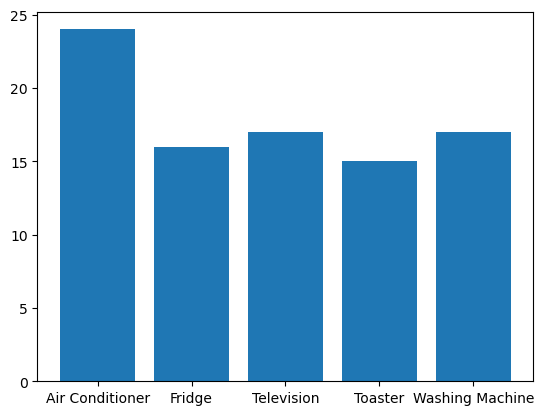

,Call_Flag,Answered_Y_/_N,Abandoned_Calls,Abandoned_call_per
Department,,,,
Air Conditioner,362,274,88,24.0
Fridge,325,273,52,16.0
Television,382,317,65,17.0
Toaster,360,305,55,15.0
Washing Machine,343,286,57,17.0


In [36]:
getdeptcharts()